In [14]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Helper Functions
# Visualize location based data with latitude as xvar, longitude as yvar
def geo_plot(pdm, xvar, yvar, value_var, use_log):
    pdm = pdm[np.isfinite(pdm[xvar])]
    pdm = pdm[np.isfinite(pdm[yvar])]
    pdm = pdm[np.isfinite(pdm[value_var])]
    
    limit = len(pdm)
    # limit = 10
    pdm_small = pdm[0:limit]
    scale_factor=10000
    val_scale_factor=1
    pdm_small[yvar] = (np.abs(pdm_small[yvar]/scale_factor)).astype(int)
    #pdm_small[yvar] = (pdm_small[yvar]/scale_factor).astype(int)
    pdm_small[xvar] = (np.abs(pdm_small[xvar]/scale_factor)).astype(int)
    pdm_small[value_var] = pdm_small[value_var]*val_scale_factor
    #pdm_small.sort_values(by=[xvar], inplace=True, ascending=True)
    #pdm_small.sort_values(by=[yvar], inplace=True, ascending=False)
    if use_log == 1:
        pdm_small[value_var] = np.log(pdm_small[value_var])
    fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    
    hm = pdm_small.pivot_table(index=yvar, columns=xvar, values=value_var, fill_value=0)
    ax = sb.heatmap(hm)
    ax.figure.axes[0].invert_xaxis()
    ax.figure.axes[0].invert_yaxis()
    
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

train_data = pd.read_csv("./data/zillow/train_2016.csv", parse_dates=["transactiondate"])
train_data["transactionmonth"] = train_data["transactiondate"].dt.month
train_data["transactionyear"] = train_data["transactiondate"].dt.year
train = pd.read_csv("./data/zillow/properties_2016.csv")
train = pd.merge(train, train_data, on="parcelid")
print(train.size)


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


5630282


Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

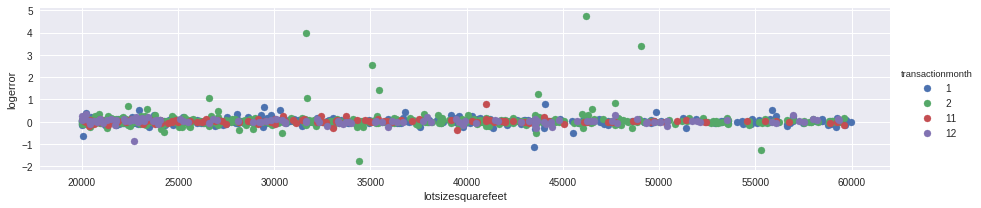

In [47]:
print(train.columns)
rt = train
small = rt['lotsizesquarefeet'].between(0,6000)
mid = rt['lotsizesquarefeet'].between(6001, 20000)
mid1 =  rt['lotsizesquarefeet'].between(20000, 60000)
spring = rt['transactionmonth'].between(3,5)
summer = rt['transactionmonth'].between(6,8)
fall = rt['transactionmonth'].between(9,10)
winter = rt['transactionmonth'].between(11,12)
jf = rt['transactionmonth'].between(1,2)
rt = rt[mid1 & (winter | jf)]

fg = sns.FacetGrid(data=rt, hue='transactionmonth', aspect=4.2)
fg.map(plt.scatter, 'lotsizesquarefeet', 'logerror').add_legend()

# plt.scatter(rt.lotsizesquarefeet, rt.logerror, c="blue", marker='s')